# TASK 2: Optimisation, Pre-/Post-processing, Cost-sensitive Learning, Classifier

### Importing 

* [loadarff (scify)][loadarff]: Read an arff file.
* [glob][glob]: The glob module finds all the pathnames matching a specified pattern.
* [pandas][pandas]: Pandas stands for “Python Data Analysis Library".
* [scikit joblib][joblib]: Joblib is a set of tools to provide lightweight pipelining in Python.
* [warnings][warnings]: It filters warnings messages, and ignores them.
* [pathlib][pathlib]: This module offers classes representing filesystem paths with semantics appropriate for different operating systems.

[loadarff]:https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
[glob]:https://docs.python.org/3/library/glob.html
[pandas]:http://pandas.pydata.org/pandas-docs/stable/
[joblib]:https://scikit-learn.org/stable/modules/model_persistence.html
[warnings]:https://docs.python.org/3/library/warnings.html#warnings.filterwarnings
[pathlib]:https://docs.python.org/3/library/pathlib.html

In [1]:
from scipy.io.arff import loadarff
from glob import glob
import pandas as pd
from sklearn.externals import joblib
import pathlib

import warnings
warnings.filterwarnings('ignore')

### Reading and Loading

Read all files inside "Test" folder, and sort list of files.

In [2]:
ff = glob("../Test/*.arff", recursive=True)
ff = sorted(ff, key=lambda x: int(''.join(filter(str.isdigit, x))))

Select speech files

In [3]:
speech_files = []

for f in ff:
    if "speech" in f:
        speech_files.append(f)

### Loading Classifiers

Load ensemble and stack classifiers

In [4]:
stack = joblib.load("stack_speech.pkl")
ensemble = joblib.load("ensemble_speech.pkl")

### Setting variable cols

Set variable cols because stack was fitted with a specific number of columns

In [5]:
cols = ['f000002', 'f000003', 'f000010', 'f000014', 'f000018', 'f000022', 'f000026', 'f000027', 'f000029', 'f000032', 'f000035', 'f000038', 'f000041', 'f000044', 'f000046', 'f000048', 'f000049', 'f000050', 'f000051', 'f000052', 'f000053', 'f000054', 'f000055', 'f000057', 'f000058', 'f000059', 'f000060', 'f000061', 'f000062', 'f000063', 'f000064', 'f000065', 'f000066', 'f000067', 'f000068', 'f000069', 'f000070', 'f000071', 'f000072', 'f000073', 'f000074', 'f000075', 'f000076', 'f000077', 'f000078', 'f000079', 'f000080', 'f000081', 'f000082', 'f000083', 'f000084', 'f000085', 'f000086', 'f000087', 'f000089', 'f000090', 'f000091', 'f000092', 'f000093', 'f000094', 'f000095', 'f000096', 'f000097', 'f000098', 'f000099', 'f000100', 'f000101', 'f000102', 'f000103']

### Speech prediction

Load arff files to pandas dataframe and predict speech or no speech.

In [6]:
### Create new folder for predictions
path = "../Prediction/Speech/"
pathlib.Path(path).mkdir(parents=True, exist_ok=True)

for f in speech_files: 
    with open(f) as arff:
        
        ### Load data
        print("Loading data from arff file:", f.split("/")[-1])
        data, meta = loadarff(arff)
        df = pd.DataFrame(data)
        
        ### Convert to stack format and predict
        S = stack.transform(df[cols])
        pred = ensemble.predict(S)
        
        ### format prediction
        speech_prediction = ["1" if i == 1 else "0" for i in pred]
        
        ### Write file with predictions
        name = f.split("/")[-1]
        name = ".".join(name.split(".")[:-1]) + ".txt"
        print("saving prediction file:", name, end="\n\n")
        with open(path + name, "w") as pred_file:
            pred_file.write("\n".join(speech_prediction))

Loading data from arff file: 15.speech.arff
Transforming...

estimator  0: [BC: BaggingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [RF: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [GB: LGBMClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

saving prediction file: 15.speech.txt

Loading data from arff file: 16.speech.arff
Transforming...

estimator  0: [BC: BaggingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [RF: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from 

    DONE

estimator  1: [RF: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [GB: LGBMClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

saving prediction file: 28.speech.txt

Loading data from arff file: 29.speech.arff
Transforming...

estimator  0: [BC: BaggingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [RF: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [GB: LGBMClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

saving prediction fil

### TEST

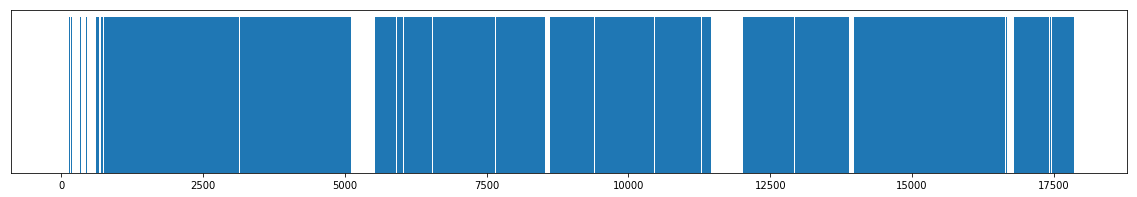

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 3)
plt.yticks([], [])
plt.bar(range(len(speech_prediction)), speech_prediction, width=1)
plt.show()

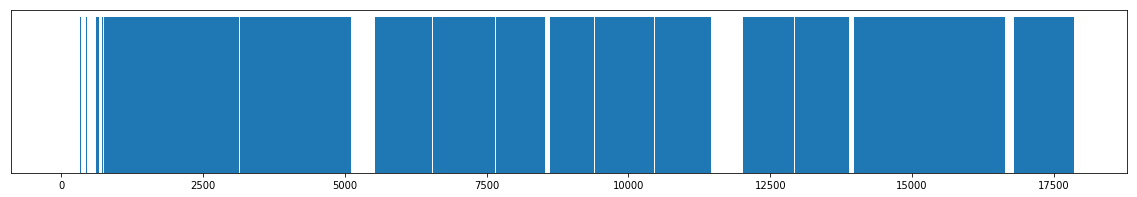

In [8]:
plt.rcParams["figure.figsize"] = (20, 3)
plt.yticks([], [])
plt.bar(range(len(df["class"])), df["class"], width=1)
plt.show()

In [16]:
print(speech_prediction[:5])
print(df["class"].head())

['1', '1', '1', '1', '1']
0    b'speech'
1    b'speech'
2    b'speech'
3    b'speech'
4    b'speech'
Name: class, dtype: object
